
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 1 <br>
</div>


---



### Full Name : Amir Malekhosseini
### Student Number : 401100528
___

## Introduction

In this assignment, we are going to investigate some of the basic methods of image enhancement.

## Section 1: Image Enhancement

Importing necessary Libraries. You cannot import and use any other libraries

In [1]:
# Do not modify this cell
import cv2
import numpy as np
import matplotlib.pylab as plt


### Q1: Intensity Enhancement


In this question, you will implement some of the intensity processing functions and apply them on a given image. In the final part, you will be asked to use these functions to enhance the intensity of a given image.

<ol>
<li>
 <b>Negative Transform :</b> $y=255-x$

 <li>
 <b>Log Transform :</b> $y=\frac{255 \log(1+ \alpha x)}{\log(1+255 \alpha)}$

 <li>
 <b>Gamma Transform :</b> $y=255(\frac{x}{255})^{\gamma}$

 </ol>

In the following cells, complete the functions for

In [2]:

def negative_transform(img: np.ndarray):
  
  return 255 - img


In [3]:
def log_transform(img: np.ndarray, alpha):
  
  c = 255 / np.log(1 + 255 * alpha)
  return c * np.log(1 + alpha * img).astype(np.uint8)


In [4]:
def gamma_transform(img: np.ndarray, gamma):
  
    normalized = img / 255.0
    return (255 * (normalized ** gamma)).astype(np.uint8)

Now, apply these transformations on `Q1-input1.jpg` (on RGB channels) and save the output images in `Q1-output-neg.jpg`, `Q1-output-log.jpg` and `Q1-output-gamma.jpg`, respectively. You can set $\alpha$ and $\gamma$ whatever you want, but effect on the intensity of the image should be noticable.

In [ ]:
img = cv2.imread('Q1-input1.jpg')

# Apply transformations
neg_img = negative_transform(img)
cv2.imwrite('Q1-output-neg.jpg', neg_img)

log_img = log_transform(img, alpha=0.1)
cv2.imwrite('Q1-output-log.jpg', log_img)

gamma_img = gamma_transform(img, gamma=2.2)  
cv2.imwrite('Q1-output-gamma.jpg', gamma_img)



True

Finally, use the functions you implemented to enhance the intensity of `Q1-input2.jpg`. You may use any of the functions in anyway you desire. Your final score on the question depends on the quality of the output. Save the output image as `Q1-output-enhanced.jpg`.

In [7]:
img2 = cv2.imread('Q1-input2.jpg')
enhanced = gamma_transform(log_transform(img2, alpha=0.05), gamma=0.5)
cv2.imwrite('Q1-output-enhanced.jpg', enhanced)

True

### Q2: Histogram Specification


In this question, we will implement histogram specification for intensity enhancement.

Complete the following code to specify the histogram of the input image, with a given histogram `hist1`, to target histogram `hist2`.

**Note**: Assume that the input image has only one channel, i.e, it is a $H \times W$ numpy array.

In [ ]:
def histogram_specification(img: np.ndarray, hist1: np.ndarray, hist2: np.ndarray):

    cdf1 = hist1.cumsum()
    cdf1 = (cdf1 - cdf1.min()) * 255 / (cdf1.max() - cdf1.min())
    cdf2 = hist2.cumsum()
    cdf2 = (cdf2 - cdf2.min()) * 255 / (cdf2.max() - cdf2.min())

    lut = np.interp(cdf1, cdf2, np.arange(256))
    return lut[img].astype(np.uint8)




To test the above code, open `Q2-input1.jpg` and `Q2-input2.jpg`, and convert the histogram of the first one to the second one. Save the resulting image as `Q2-output.jpg`. The aim of specifying the histograms is to enhance the first image, so your score depends on the quality of your result.

In [ ]:
# Apply to images
img1 = cv2.imread('Q2-input1.jpg', 0) 
img2 = cv2.imread('Q2-input2.jpg', 0)

hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

# Perform histogram specification
output = histogram_specification(img1, hist1, hist2)
cv2.imwrite('Q2-output.jpg', output)

True

### Q3: Color Processing

In image `Q3-input.jpg`, change the color of the flowers red, blue and yellow to violet, pink and orange respectively. Save the result as `Q3-output.jpg`. Your score of this question depends on the quality of the output image.

In [ ]:
import cv2
import numpy as np

img = cv2.imread('Q3-input.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask_red_lower = cv2.inRange(hsv, (0, 50, 50), (10, 255, 255))
mask_red_upper = cv2.inRange(hsv, (160, 50, 50), (180, 255, 255))
mask_red = cv2.bitwise_or(mask_red_lower, mask_red_upper)

mask_blue = cv2.inRange(hsv, (100, 50, 50), (120, 255, 255))

mask_yellow = cv2.inRange(hsv, (20, 50, 50), (30, 255, 255))


hsv[mask_red > 0, 0] = 140    
hsv[mask_blue > 0, 0] = 150   
hsv[mask_yellow > 0, 0] = 10  


hsv[mask_blue > 0, 1] = np.clip(
    hsv[mask_blue > 0, 1] * 0.7, 0, 255)  
hsv[mask_blue > 0, 2] = np.clip(
    hsv[mask_blue > 0, 2] * 1.1, 0, 255) 

hsv[mask_yellow > 0, 1] = np.clip(hsv[mask_yellow > 0, 1] * 1.3, 0, 255)

output = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('Q3-output.jpg', output)

True

## Section 2: Spatial Filters

### Q4: Blurring

In this question, you are going to implement a function to blur a given image using a specified method. Your function should support box filter, gaussian filter and median filter. It is permitted to use `opencv` to perform the bluring.

In [13]:
def blur(img: np.ndarray, kernel_size: int, filter: str):
    if filter == 'box':
        return cv2.blur(img, (kernel_size, kernel_size))
    elif filter == 'gaussian':
        return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    elif filter == 'median':
        return cv2.medianBlur(img, kernel_size)




Test your code with kernel size $k=3, 11, 25$ for each of filters on `Q4-input.jpg`. Save the output images with the following format:
<ul>
<li> Box filter with kernel size $k=3, 11, 25$ as Q4-output-box3.jpg, Q4-output-box11.jpg and Q4-output-box25.jpg.

<li> Gaussian filter with kernel size $k=3, 11, 25$ as Q4-output-gauss3.jpg, Q4-output-gauss11.jpg and Q4-output-gauss25.jpg (you can set $\sigma$ whaever you wish, but blurring should be observable).

<li> Median filter with kernel size $k=3, 11, 25$ as Q4-output-med3.jpg, Q4-output-med11.jpg and Q4-output-med25.jpg.
</ul>

In [14]:
# Apply filters
img = cv2.imread('Q4-input.jpg')
for k in [3, 11, 25]:
    box = blur(img, k, 'box')
    cv2.imwrite(f'Q4-output-box{k}.jpg', box)
    gauss = blur(img, k, 'gaussian')
    cv2.imwrite(f'Q4-output-gauss{k}.jpg', gauss)
    med = blur(img, k, 'median')
    cv2.imwrite(f'Q4-output-med{k}.jpg', med)

### Q5: Sharpening

In this question, you are going to sharpen a given image using Gaussian Filter.


Let $f$ be the source image and $g$ be the Gaussian kernel, then $f*g$ is the convolution of the image with this kernel, which results in a blurred image.

To sharpen the image, we can generate an unsharp mask by subtracting the blurred image from the original image:
$$m=f-f*g$$
This mask is a transparent image which has higher intensity on the edges of the original image. Now we may add this mask with a weight $\alpha$ to sharpen the original image:
$$f'=f+ \alpha m$$

First, complete the following function to generate a Gaussian kernel with a given size and $\sigma$. A $(2k+1) \times (2k+1)$ Gaussian kernel has the value $e^{\frac{-(x^2+y^2)}{2 \sigma^2}}$ at point $(x,y)$ (Center of the kernel has coordinates $(0,0)$, and we have $x,y \in [-k,k]$). You should also normalize the kernel (sum of the entries should app up to 1)

In [4]:
def gaussian_kernel(kernel_size: int, sigma):
    k = (kernel_size - 1) // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / kernel.sum()
    return kernel.astype(np.float32)  

Next, complete the following function to sharpen a given image and Gaussian kernel and $\alpha$. Your function should return both the sharpened image and the unsharp mask.

In [ ]:

def gaussian_sharpen(img: np.ndarray, kernel: np.ndarray, alpha: float) -> tuple[np.ndarray, np.ndarray]:
    if img is None:
        raise ValueError("Image is empty! Check the file path.")
    if kernel.shape[0] % 2 == 0 or kernel.shape[1] % 2 == 0:
        raise ValueError("Kernel dimensions should be odd")

    img_float = img.astype(np.float32)

    blurred = cv2.filter2D(img_float, -1, kernel)

    mask = img_float - blurred
    sharpened = img_float + alpha * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    mask_visual = np.clip(mask + 128, 0, 255).astype(np.uint8)

    return sharpened, mask_visual

Now to test your code, open `Q5-input.jpg` and sharpen it using the above function. Use a kernel size of 7 and choose a suitable value of $\sigma$ and $\alpha$ to get a desirable result. Save the sharpened image as `Q5-output-1.jpg` and the unsharp mask (grayscale image) as `Q5-output-2.jpg`. Your score on this part depends on the quality of the result.

In [5]:

img = cv2.imread('Q5-input.png')
if img is None:
    raise FileNotFoundError(
        "Image 'Q5-input.png' not found in the current directory!")

kernel = gaussian_kernel(7, sigma=1.5)

sharpened, mask = gaussian_sharpen(img, kernel, alpha=1.5)
cv2.imwrite('Q5-output-1.jpg', sharpened)
cv2.imwrite('Q5-output-2.jpg', mask)

True

### Q6: Noise removal

## A) ACE Function
Implement the ACE function using ready-made functions for histogram equalization and padding. Apply the function with different grid sizes on ACE.jpg image and report the output for each one. Also specify which output is the best.

## B) CLAHE Function
Implement the CLAHE function and apply it to CLAHE.jpg image. Also specify which output is the best. In this function, test different values for the clipping threshold and grid size, analyze the effect of each, and output the best result.

## C) add_noise Function
Complete the add_noise function to add Gaussian or Salt-and-Pepper noise to the image. Using existing library functions is not allowed. Read the noise.tif image in grayscale and add Gaussian and Salt-and-Pepper noise separately to the image and display the output.

## D) denoise Function
Save the image resulting from adding Salt-and-Pepper noise and denoise it using an appropriate filter.

In [18]:
def ACE(image, gridSize):
    h, w = image.shape
    output = np.zeros_like(image)
    for i in range(0, h, gridSize[0]):
        for j in range(0, w, gridSize[1]):
            tile = image[i:i+gridSize[0], j:j+gridSize[1]]
            eq_tile = cv2.equalizeHist(tile)
            output[i:i+gridSize[0], j:j+gridSize[1]] = eq_tile
    return output

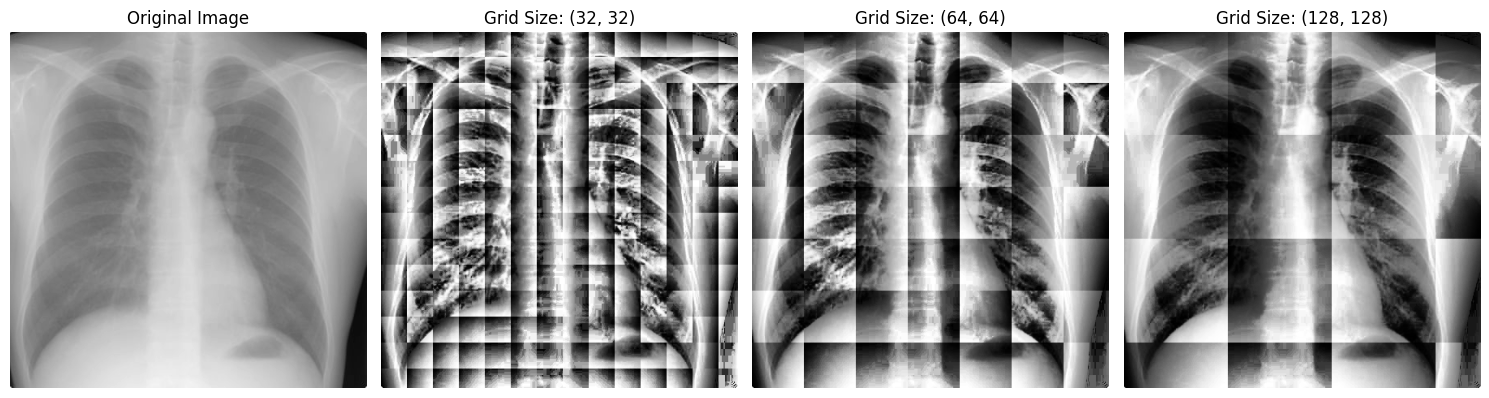

In [ ]:
image = cv2.imread('ACE.jpg', cv2.IMREAD_GRAYSCALE)

grid_sizes = [(32, 32), (64, 64), (128, 128)]
outputs = [ACE(image, gs) for gs in grid_sizes]

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (gs, out) in enumerate(zip(grid_sizes, outputs), 2):
    plt.subplot(1, 4, i)
    plt.imshow(out, cmap='gray')
    plt.title(f'Grid Size: {gs}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [19]:
def CLAHE(image, gridSize, threshold):
    clahe = cv2.createCLAHE(clipLimit=threshold, tileGridSize=gridSize)
    return clahe.apply(image)

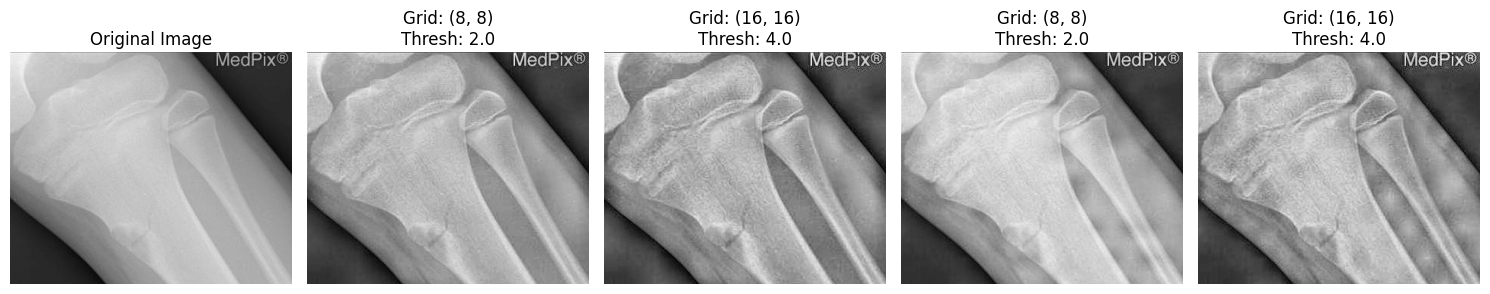

In [ ]:
image = cv2.imread('CLAHE.jpg', cv2.IMREAD_GRAYSCALE)

grid_sizes = [(8, 8), (16, 16)]
thresholds = [2.0, 4.0]
outputs = [CLAHE(image, gs, th) for gs in grid_sizes for th in thresholds]

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, (gs, th) in enumerate(zip(grid_sizes * len(thresholds), thresholds * len(grid_sizes)), 2):
    plt.subplot(1, 5, i)
    plt.imshow(outputs[i-2], cmap='gray')
    plt.title(f'Grid: {gs}\nThresh: {th}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
def add_noise(image, noise_type, args):
    if noise_type == 0:  # Gaussian
        mean, sigma = args
        noise = np.random.normal(mean, sigma, image.shape)
        noisy = image + noise
        return np.clip(noisy, 0, 255).astype(np.uint8)
    else:  # Salt-and-Pepper
        prob, = args
        noisy = image.copy()
        mask = np.random.rand(*image.shape)
        noisy[mask < prob/2] = 0
        noisy[mask > 1 - prob/2] = 255
        return noisy.astype(np.uint8)

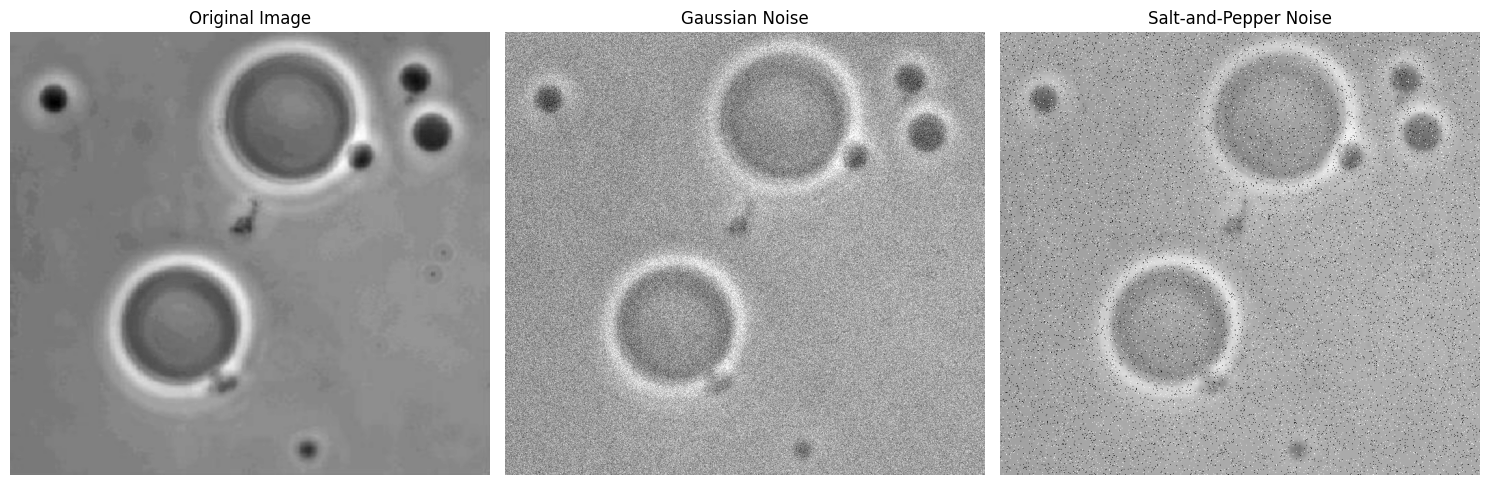

In [ ]:
image = cv2.imread('noise.tif', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
gaussian_args = [0, 25]  
gaussian_noisy = add_noise(image, 0, gaussian_args)

# Add Salt-and-Pepper noise
snp_args = [0.05]  
snp_noisy = add_noise(image, 1, snp_args)

# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(snp_noisy, cmap='gray')
plt.title('Salt-and-Pepper Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
def denoise(noisy_image):
    return cv2.medianBlur(noisy_image, 5)

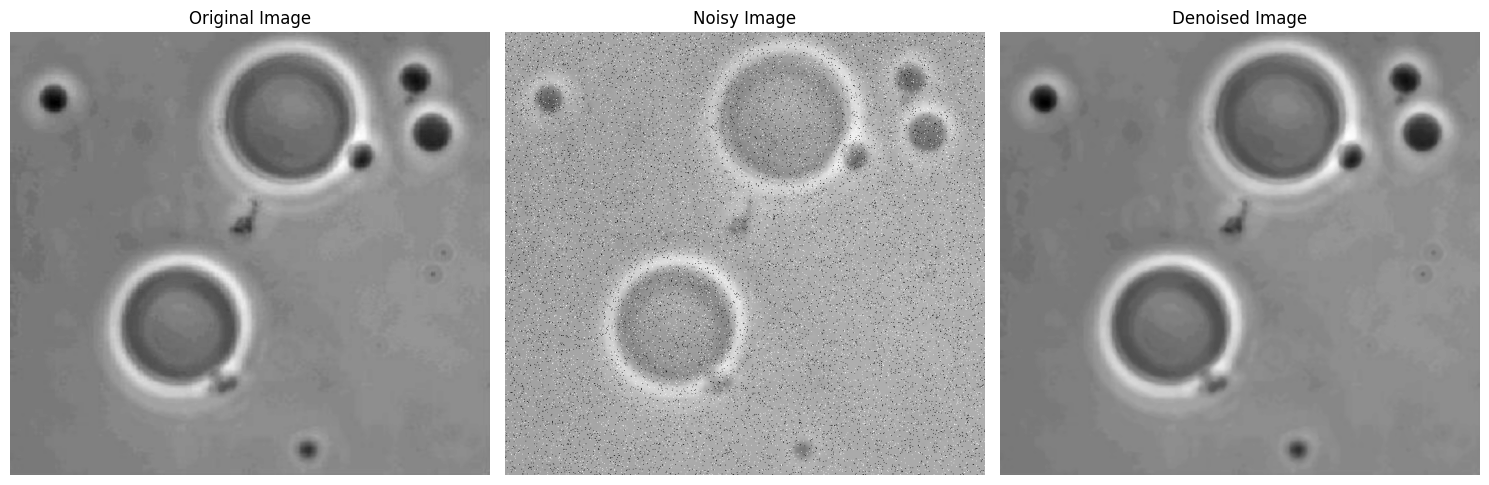

In [ ]:
denoised = denoise(snp_noisy)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(snp_noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(denoised, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.tight_layout()
plt.show()